# credit card dataset


## `1` import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


## `2` Loading the dataset

In [3]:
df = pd.read_csv(r'O:\iti\10) machine learning unsupervised\lab\CC GENERAL.csv')

## `3` EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(['CUST_ID'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.dropna(subset=['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], inplace=True)

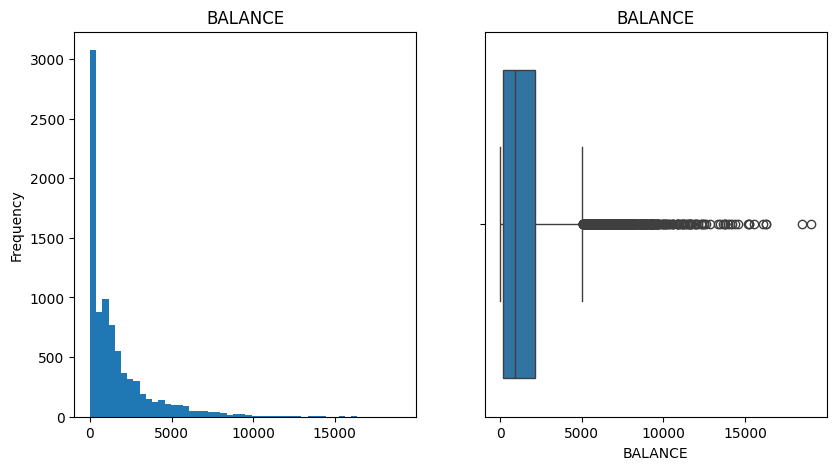

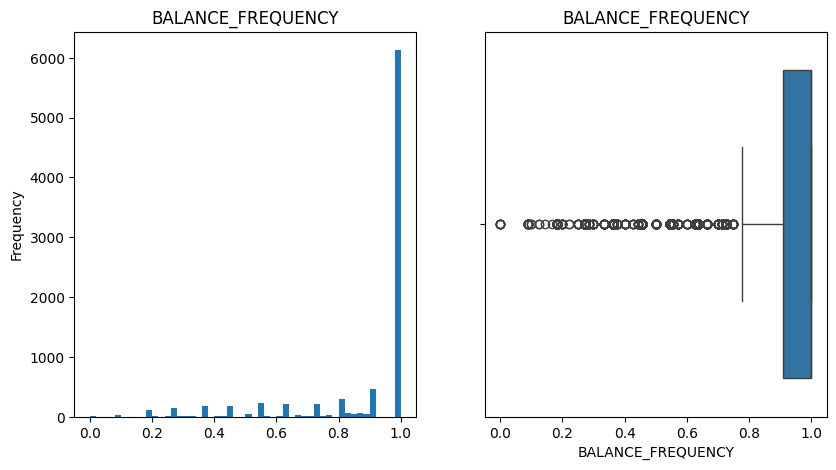

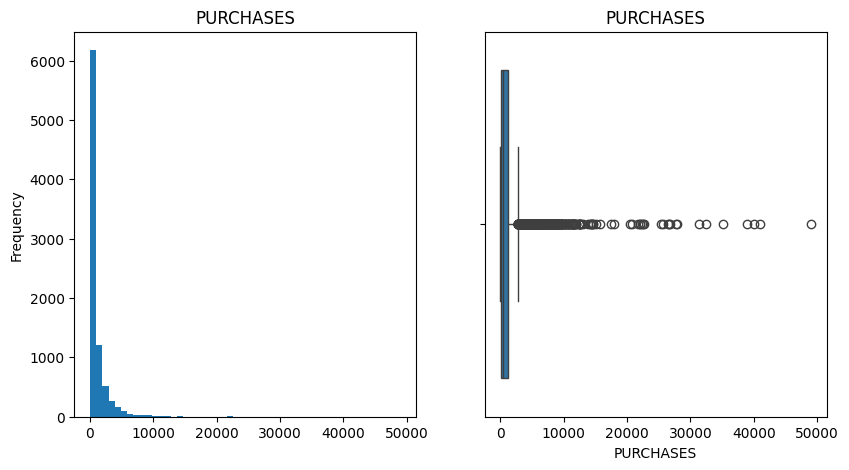

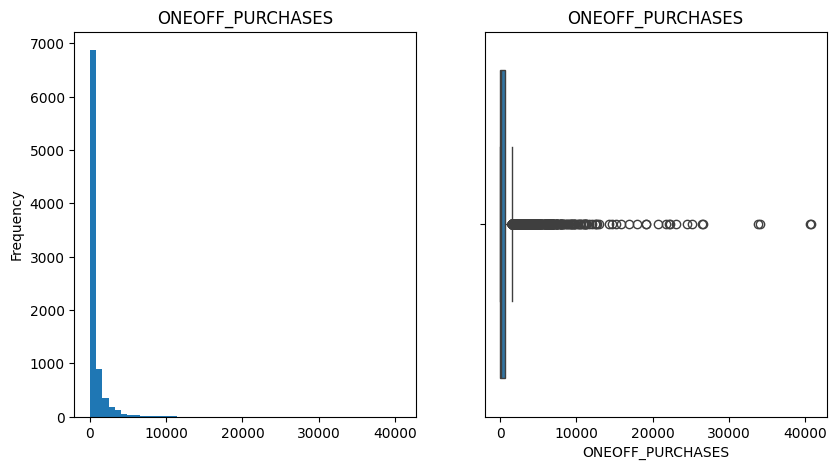

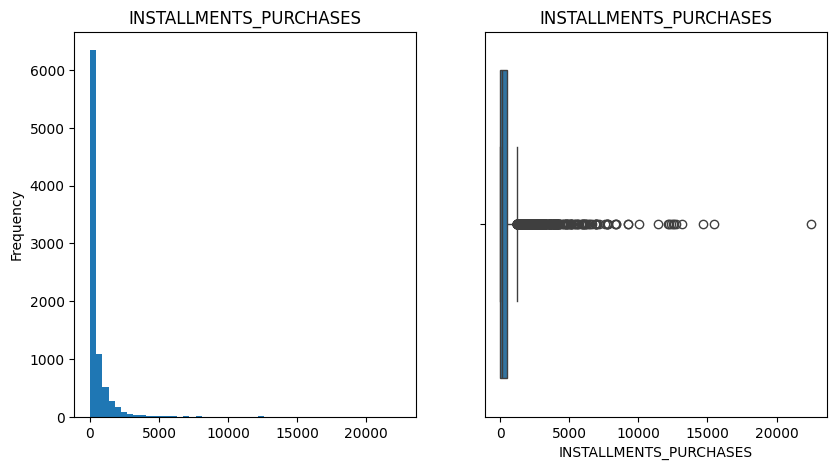

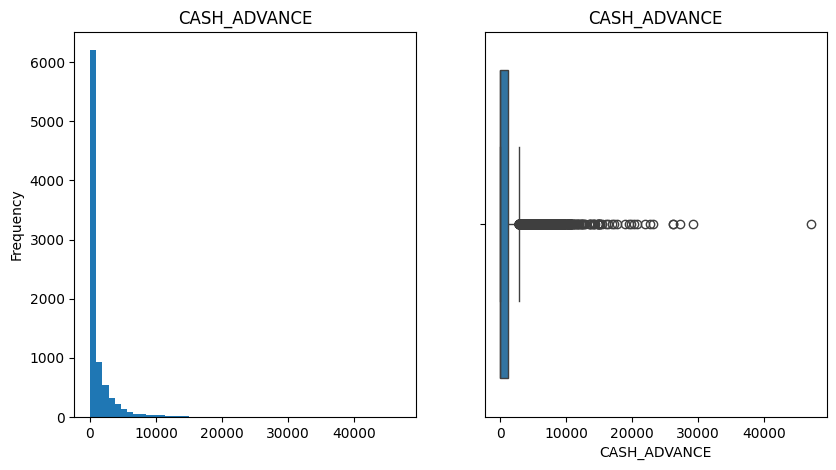

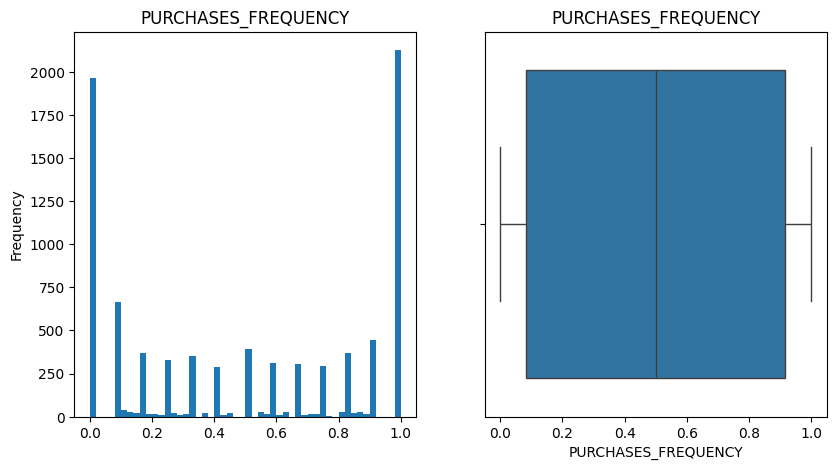

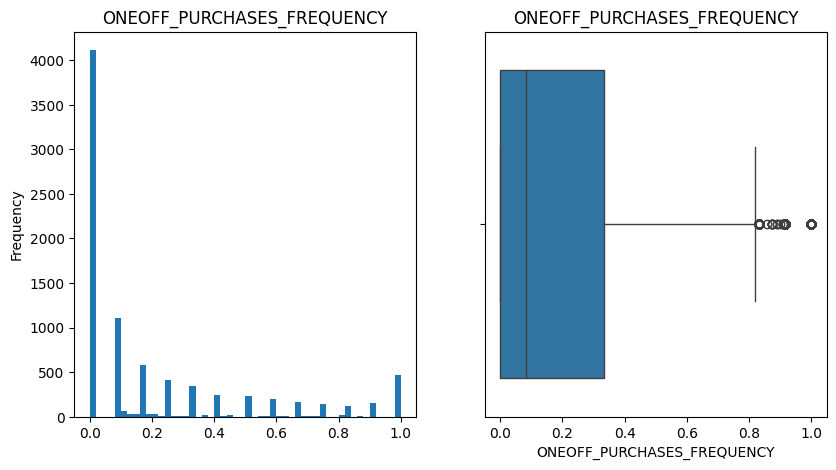

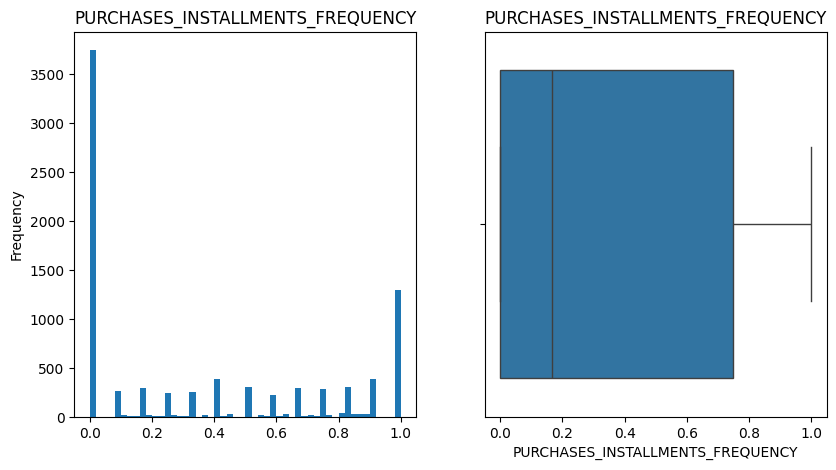

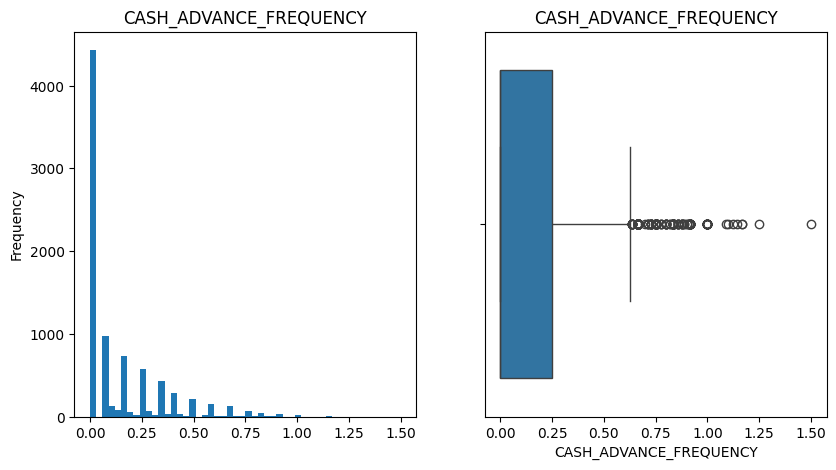

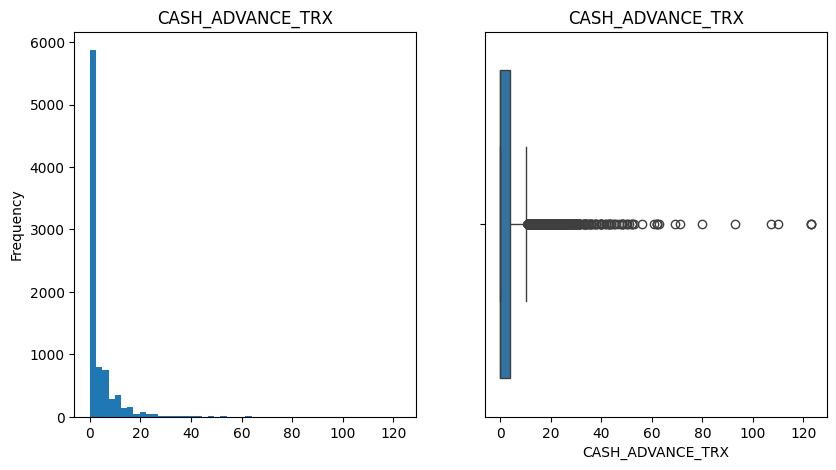

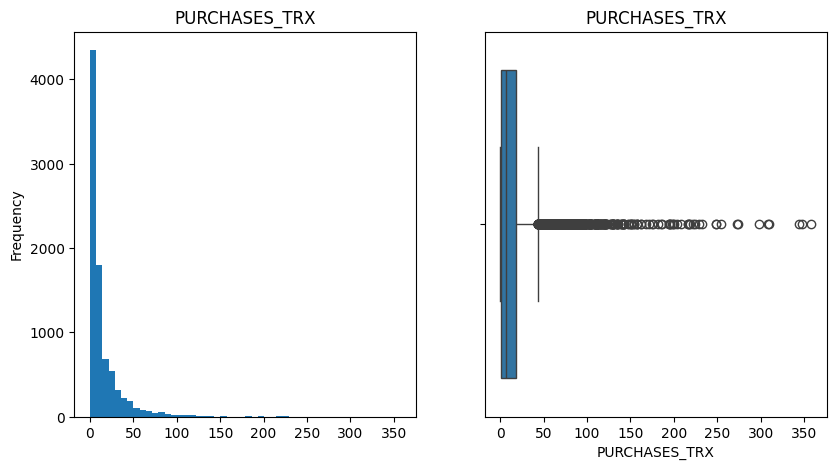

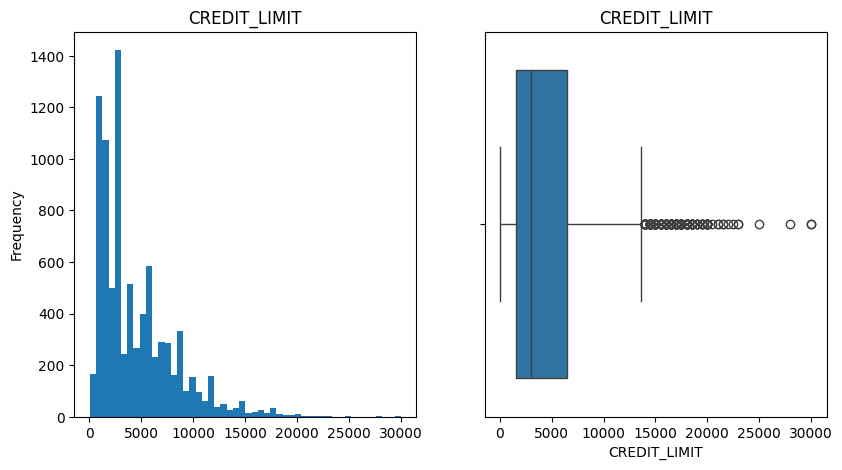

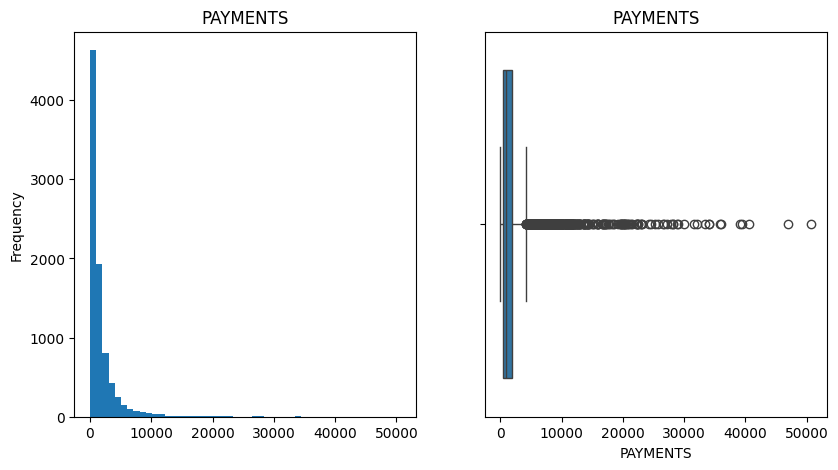

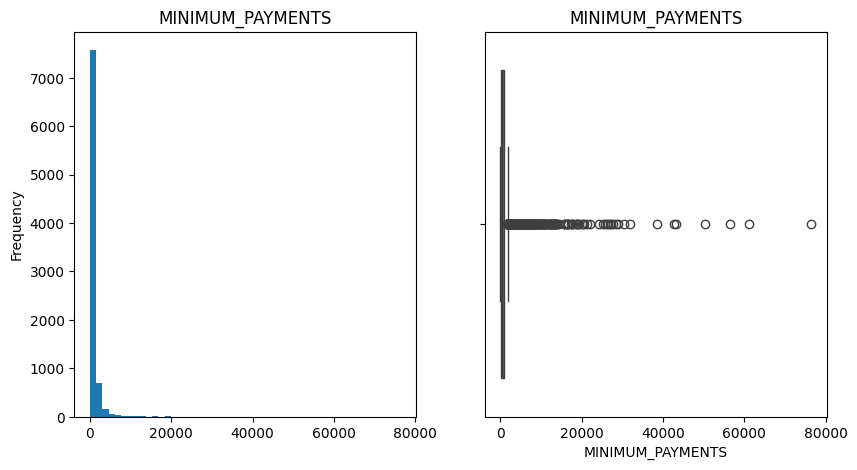

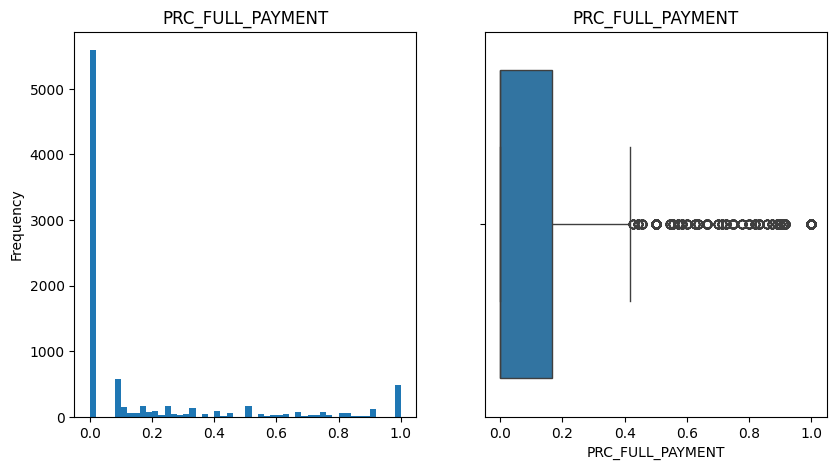

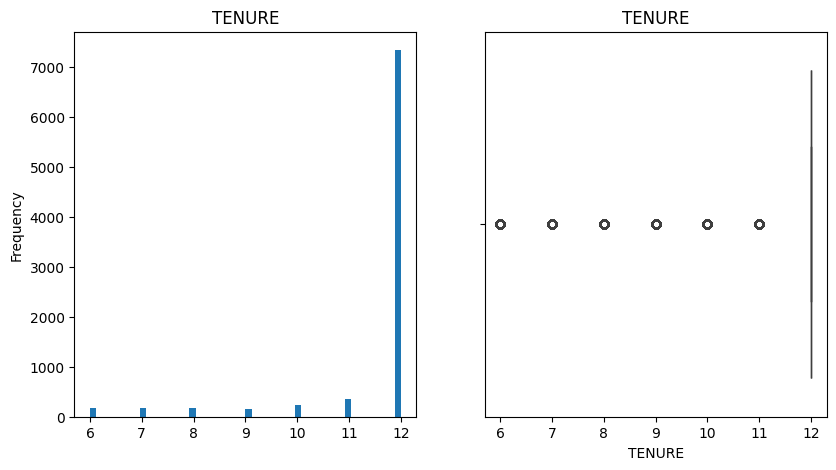

In [9]:
for col in df.select_dtypes(include="number"):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=50)
    plt.title(col)
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show();

In [10]:
Q1 = df.quantile(0.1)
Q3 = df.quantile(0.9)
IQR = Q3 - Q1
print(IQR)

BALANCE                             4353.748043
BALANCE_FREQUENCY                      0.454545
PURCHASES                           2591.360000
ONEOFF_PURCHASES                    1627.535000
INSTALLMENTS_PURCHASES              1169.500000
CASH_ADVANCE                        3126.975300
PURCHASES_FREQUENCY                    1.000000
ONEOFF_PURCHASES_FREQUENCY             0.750000
PURCHASES_INSTALLMENTS_FREQUENCY       1.000000
CASH_ADVANCE_FREQUENCY                 0.416667
CASH_ADVANCE_TRX                      10.000000
PURCHASES_TRX                         38.000000
CREDIT_LIMIT                        8300.000000
PAYMENTS                            3788.211057
MINIMUM_PAYMENTS                    1674.612832
PRC_FULL_PAYMENT                       0.720779
TENURE                                 2.000000
dtype: float64


In [11]:
IQR.fillna(IQR.iloc[-1], inplace=True)
print(IQR)

BALANCE                             4353.748043
BALANCE_FREQUENCY                      0.454545
PURCHASES                           2591.360000
ONEOFF_PURCHASES                    1627.535000
INSTALLMENTS_PURCHASES              1169.500000
CASH_ADVANCE                        3126.975300
PURCHASES_FREQUENCY                    1.000000
ONEOFF_PURCHASES_FREQUENCY             0.750000
PURCHASES_INSTALLMENTS_FREQUENCY       1.000000
CASH_ADVANCE_FREQUENCY                 0.416667
CASH_ADVANCE_TRX                      10.000000
PURCHASES_TRX                         38.000000
CREDIT_LIMIT                        8300.000000
PAYMENTS                            3788.211057
MINIMUM_PAYMENTS                    1674.612832
PRC_FULL_PAYMENT                       0.720779
TENURE                                 2.000000
dtype: float64


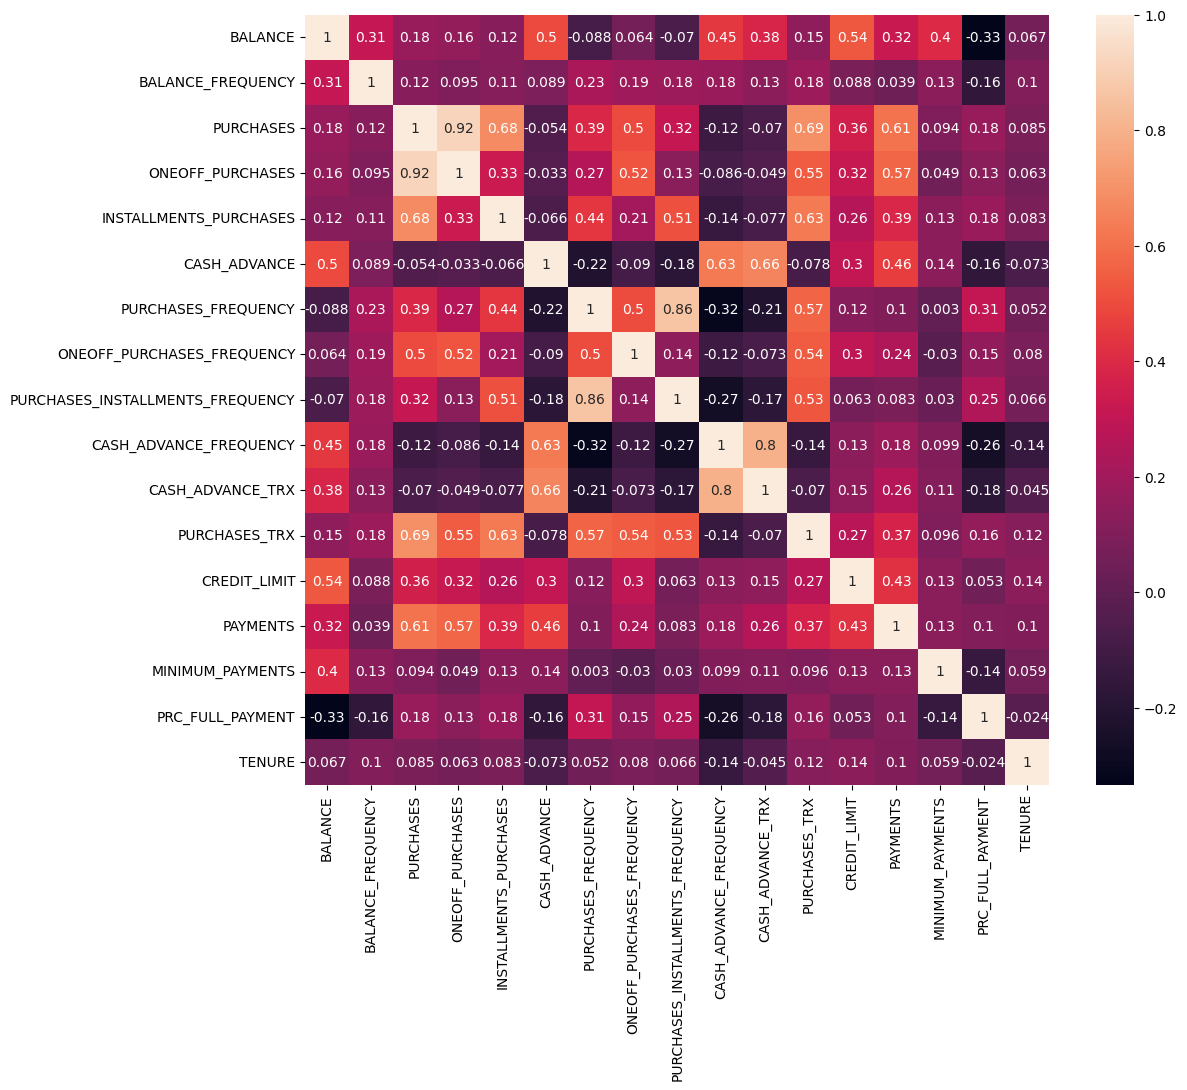

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## `4` standardize the data

In [13]:
df_log_transformed = df.copy()
for col in df_log_transformed.columns:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

df_log_transformed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
5,7.501540,0.693147,7.196147,0.000000,7.196147,0.000000,0.510826,0.000000,0.459532,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,2.564949


## `5` plot Elbow method and silhout score

In [ ]:
inertias = []
silhout_scores = []
k_range = range(2, 10)
for k in k_range:
	kmeans = KMeans(n_clusters=k, random_state=1234)
	kmeans.fit(df_log_transformed)
	score = silhouette_score(df_log_transformed, kmeans.labels_)
	silhout_scores.append(score)
	inertias.append(kmeans.inertia_)

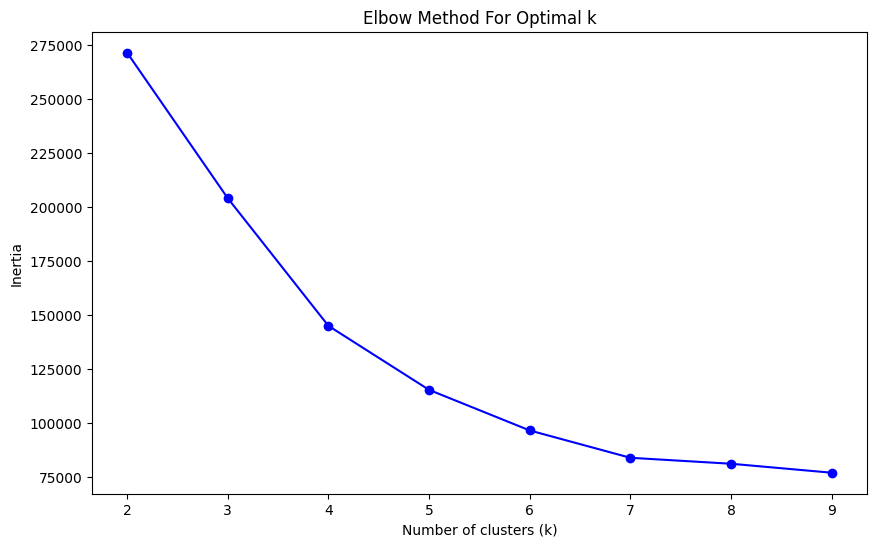

In [ ]:
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For k')
plt.show()

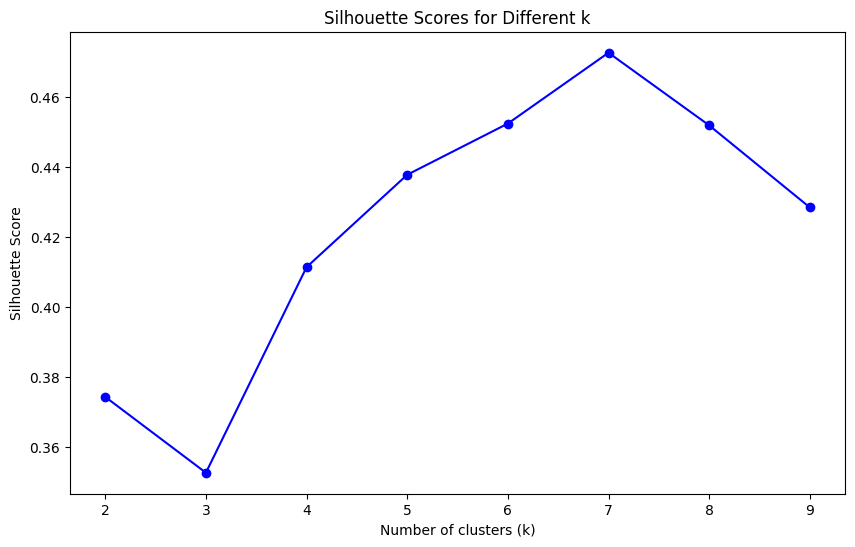

In [ ]:
plt.plot(range(2, len(silhout_scores) + 2), silhout_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k')
plt.show()

## `6` Kmeans model

In [17]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(df_log_transformed)

KMeans(n_clusters=7, random_state=1234)

In [18]:
df['cluster_id'] = kmeans.labels_
df['cluster_id'].value_counts()

cluster_id
1    1989
2    1768
3    1648
5    1052
6     953
4     761
0     465
Name: count, dtype: int64

## `7` Visualize the results

In [19]:
df_log_transformed['Cluster'] = df['cluster_id']
pca = PCA(0.9)
x_pca = pca.fit_transform(df_log_transformed.drop('Cluster', axis=1))

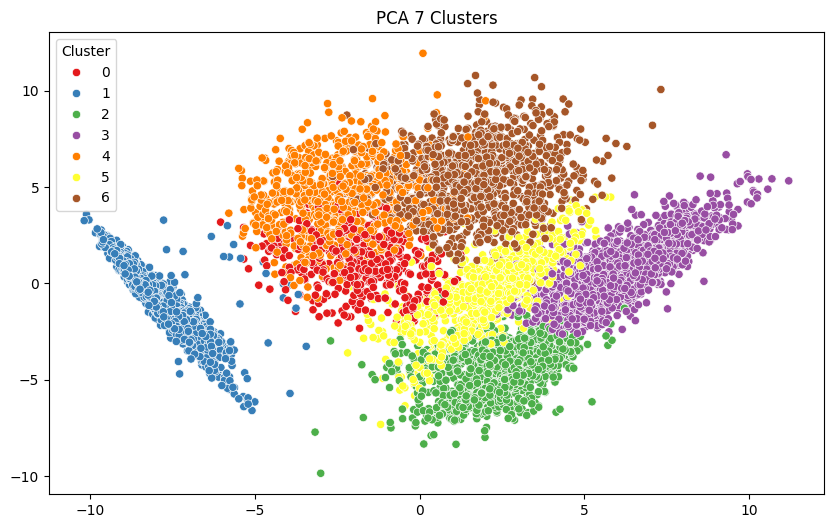

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df_log_transformed['Cluster'], palette='Set1')
plt.title("PCA of 7 Clusters")
plt.legend(title="Cluster")
plt.show()

In [21]:
tsne = TSNE(n_components=2,random_state=1234)
tsne_fit = tsne.fit_transform(df_log_transformed)

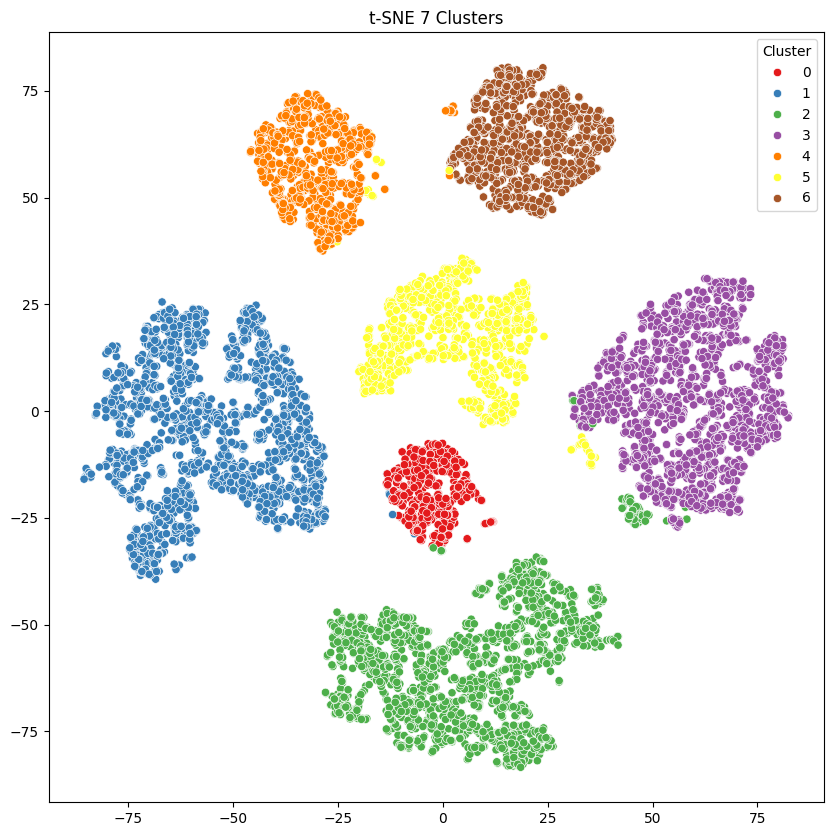

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=tsne_fit[:, 0], y=tsne_fit[:, 1], hue=df_log_transformed['Cluster'], palette="Set1")
plt.title("t-SNE of 7 Clusters")
plt.legend(title="Cluster")
plt.show()

In [23]:
silhout= silhouette_score(df_log_transformed.drop('Cluster', axis=1), df_log_transformed['Cluster'])
print(f'Silhouette Score: {silhout}')

Silhouette Score: 0.4726365884811782


## `1` KMEANS from scratch

In [ ]:
# 1. Initialize centroids
def initialize_centroids(df, k):
    centroids = df.sample(n=k, random_state=1234).values
    return centroids

# 2. Assign clusters
def clusters(df, centroids):
    distances = np.sqrt(((df.values[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    return np.argmin(distances, axis=1)

# 3. Update centroids
def update_centroids(df, labels, k):
    new_centroids = np.array([df.values[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# 4. Repeat 2-3 until convergence
def kmeans(df, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(df, k)
    for _ in range(max_iters):
        labels = clusters(df, centroids)
        new_centroids = update_centroids(df, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids


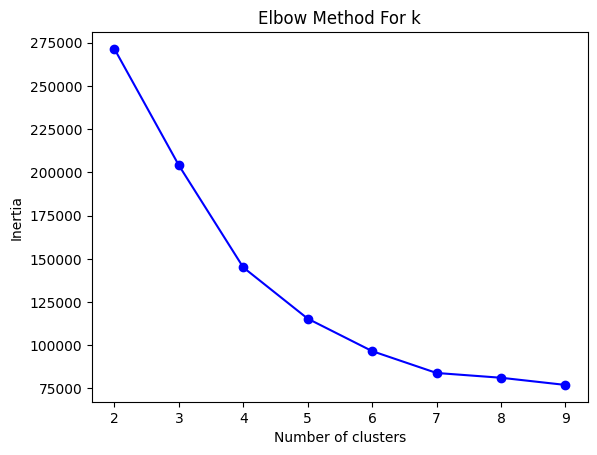

In [34]:
def elbow_method(data, k_range):
    inertias = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=1234)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

k_range = range(2, 10)
elbow = elbow_method(df_log_transformed.drop('Cluster', axis=1), k_range)

plt.plot(k_range, elbow, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For k')
plt.show()

In [25]:
k = 7
labels, centroids = kmeans(df_log_transformed.drop('Cluster', axis=1), k)
df_log_transformed['Cluster'] = labels

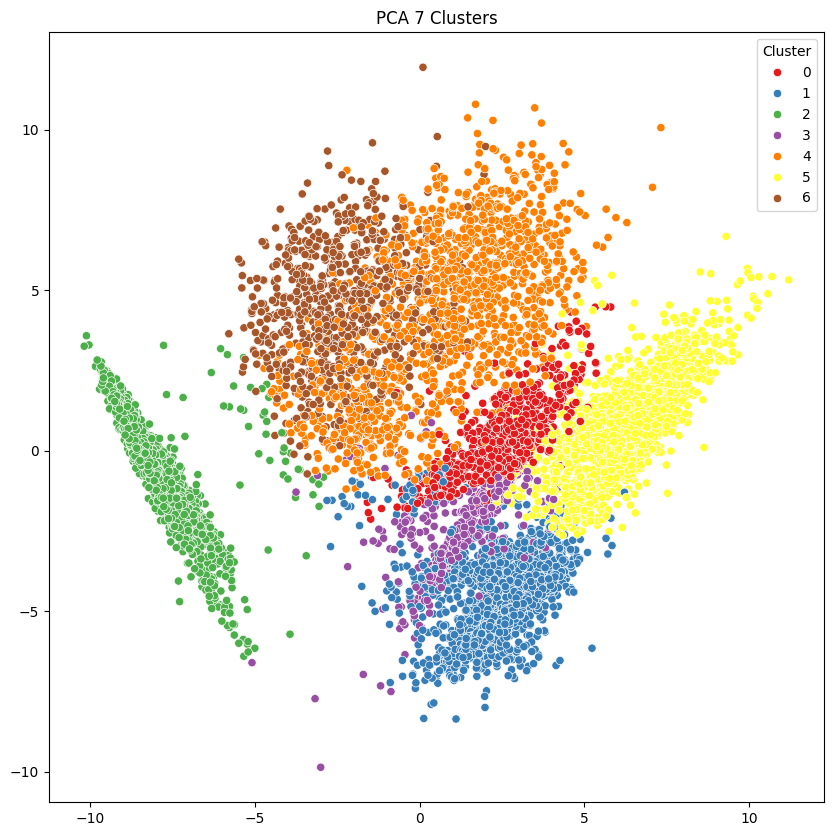

In [26]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df_log_transformed['Cluster'], palette='Set1')
plt.title("PCA 7 Clusters")
plt.legend(title="Cluster")
plt.show()

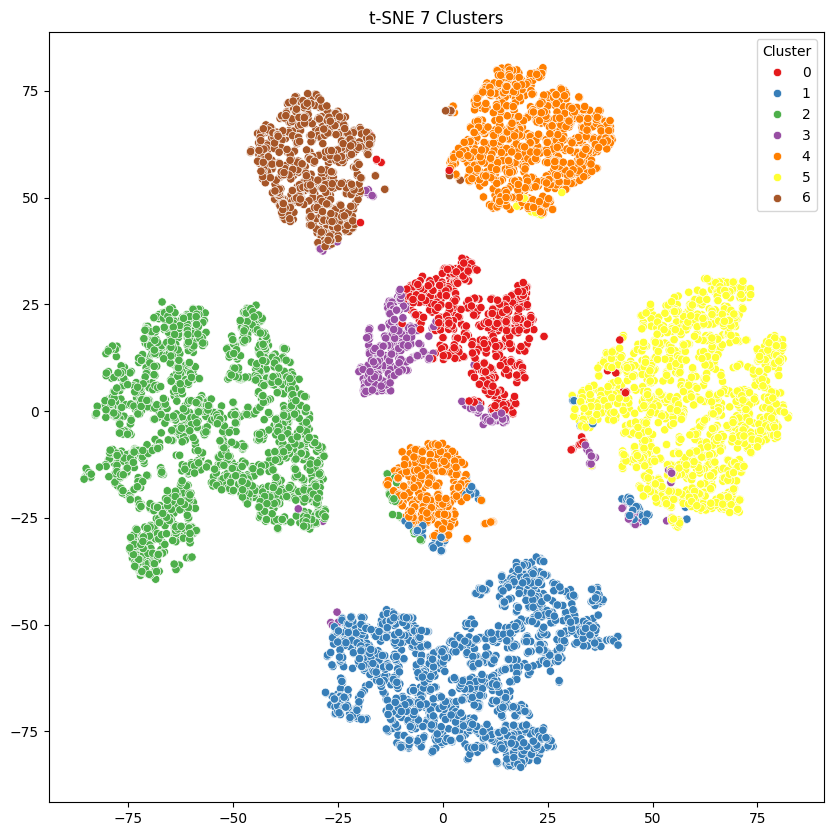

In [27]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_fit[:, 0], y=tsne_fit[:, 1], hue=df_log_transformed['Cluster'], palette="Set1")
plt.title("t-SNE 7 Clusters")
plt.legend(title="Cluster")
plt.show()